In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [2]:
from sklearn import neighbors

# Build the model
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

KNeighborsRegressor(n_neighbors=10)

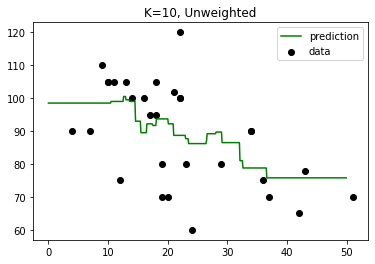

In [3]:
# Generating a set of loudness values between `0` and `50`, incrementing by `0.1`
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Generating predictions for each of the loudness values
Y_ = knn.predict(T)

# Plotting the training data and the prediction line for the newly generated loudness values
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

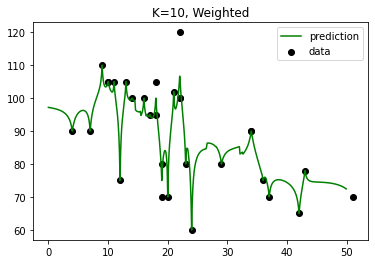

In [4]:
# Run the same model, this time with weights
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up the prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()


In [5]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


In [6]:
# Run the same model, this time with both features

knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = music[['duration', 'loudness']]
Y = music.bpm
knn_w.fit(X, Y)

KNeighborsRegressor(n_neighbors=10, weights='distance')

In [7]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.42 (+/- 0.78)
Weighted Accuracy: -0.26 (+/- 0.74)


Adding both features reduced accuracy but weighting performed better. 

In [8]:
# Run the same model, this time with both features and no weights

knn_w = neighbors.KNeighborsRegressor(n_neighbors=10)
X = music[['duration', 'loudness']]
Y = music.bpm
knn_w.fit(X, Y)

KNeighborsRegressor(n_neighbors=10)

In [9]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.42 (+/- 0.78)
Weighted Accuracy: -0.42 (+/- 0.78)


Removing weights using both features was as expected in that weight accuracy decreased but unweighted remained unchanged.

In [10]:
# Run the same model, this time with both features and with weights and reducing k to 5

knn_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
X = music[['duration', 'loudness']]
Y = music.bpm
knn_w.fit(X, Y)

KNeighborsRegressor(weights='distance')

In [11]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.42 (+/- 0.78)
Weighted Accuracy: -0.51 (+/- 1.24)


Decreasing k from 10 to 5 made weighted accuracy even worse. 

In [12]:
# Run the same model, this time with both features and no weights and reducing k to 5

knn_w = neighbors.KNeighborsRegressor(n_neighbors=5)
X = music[['duration', 'loudness']]
Y = music.bpm
knn_w.fit(X, Y)

KNeighborsRegressor()

In [13]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.42 (+/- 0.78)
Weighted Accuracy: -0.75 (+/- 1.16)


Reducing k and removing weights left unweighted accuracy unchanged but weighted even worse. 

In [14]:
# Run the same model, this time with both features and with weights and increasing k to 15

knn_w = neighbors.KNeighborsRegressor(n_neighbors=15, weights='distance')
X = music[['duration', 'loudness']]
Y = music.bpm
knn_w.fit(X, Y)

KNeighborsRegressor(n_neighbors=15, weights='distance')

In [15]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.42 (+/- 0.78)
Weighted Accuracy: -0.23 (+/- 0.61)


In [ ]:
This improved the model but it appears that k=10 is better. Apparently, adding one more feature made KNN perform worse